# Objetivo:
 

 - Encontrar o melhor algoritmo  para fazer a previsão do preço dos carros populares. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/robertferro/carros_populares/main/3%20-%20EDA/carros_populares_filtrados.csv'

In [3]:
df = pd.read_csv(url, sep = ',')

In [4]:
# pd.set_option('display.max_rows', 250)
# df.modelo.value_counts().tail(250)
df.head()

,marca,modelo,motor,quilometragem,ano,preco,informacoes
0,chevrolet,agile,1.4,91000.0,2011,25990.0,Agile 1.4 Lt 5p
1,chevrolet,agile,1.4,78400.0,2011,23499.0,Agile 1.4 Ltz 5p
2,chevrolet,agile,1.4,123915.0,2013,28900.0,Agile 1.4 Ltz 5p
3,chevrolet,agile,1.4,91000.0,2013,28000.0,Agile 1.4 Lt 5p
4,chevrolet,agile,1.4,106863.0,2014,31990.0,Agile Agile 1.4 Ltz 8v Flex 4p Manual


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 0 to 9160
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   marca          9161 non-null   object 
 1   modelo         9161 non-null   object 
 2   motor          9161 non-null   float64
 3   quilometragem  9161 non-null   float64
 4   ano            9161 non-null   int64  
 5   preco          9161 non-null   float64
 6   informacoes    9161 non-null   object 
dtypes: float64(3), int64(1), object(3)
memory usage: 501.1+ KB


In [6]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
motor,9161.0,1.66,0.48,1.0,1.4,1.6,2.0,4.0
quilometragem,9161.0,87948.85,46157.31,5000.0,49236.0,85888.0,120187.0,200000.0
ano,9161.0,2013.75,4.93,1973.0,2011.0,2014.0,2018.0,2021.0
preco,9161.0,50064.36,30792.26,6000.0,28870.0,41890.0,64990.0,199990.0


In [7]:
df.isna().sum()

marca            0
modelo           0
motor            0
quilometragem    0
ano              0
preco            0
informacoes      0
dtype: int64

 - Filtrando outliers.

In [8]:
dados = df

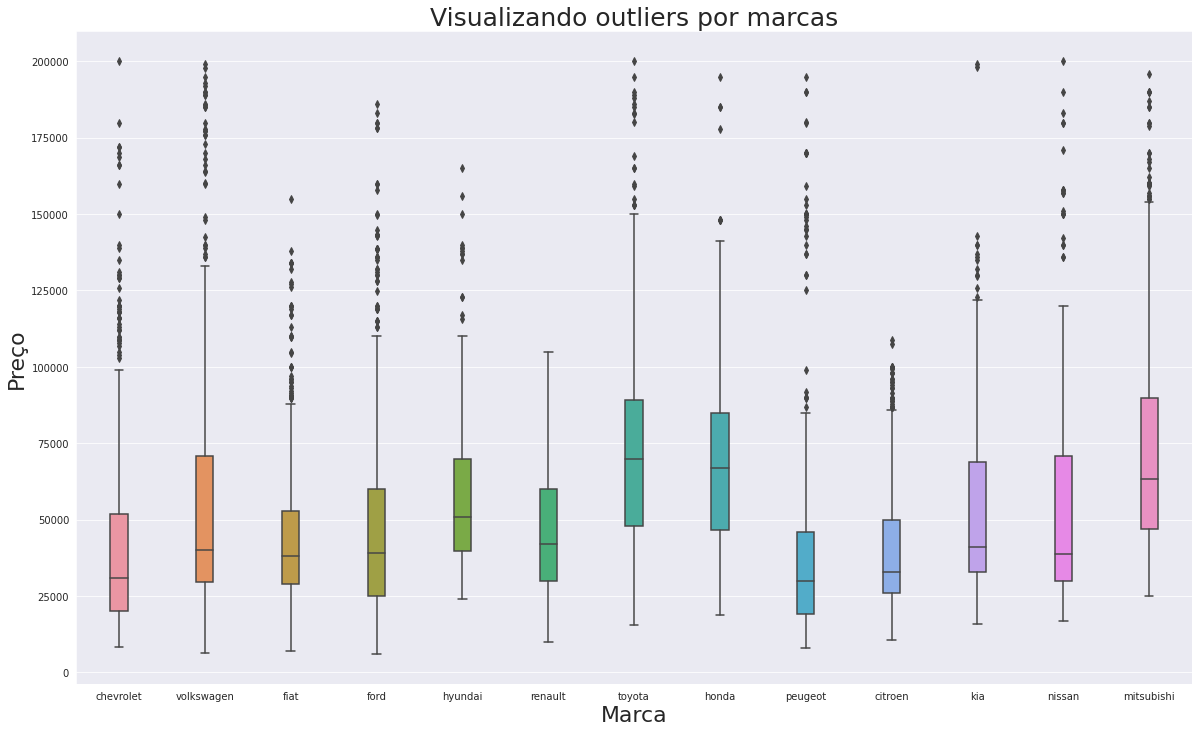

In [9]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='marca', y='preco', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Visualizando outliers por marcas', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Marca', fontsize=22)
ax

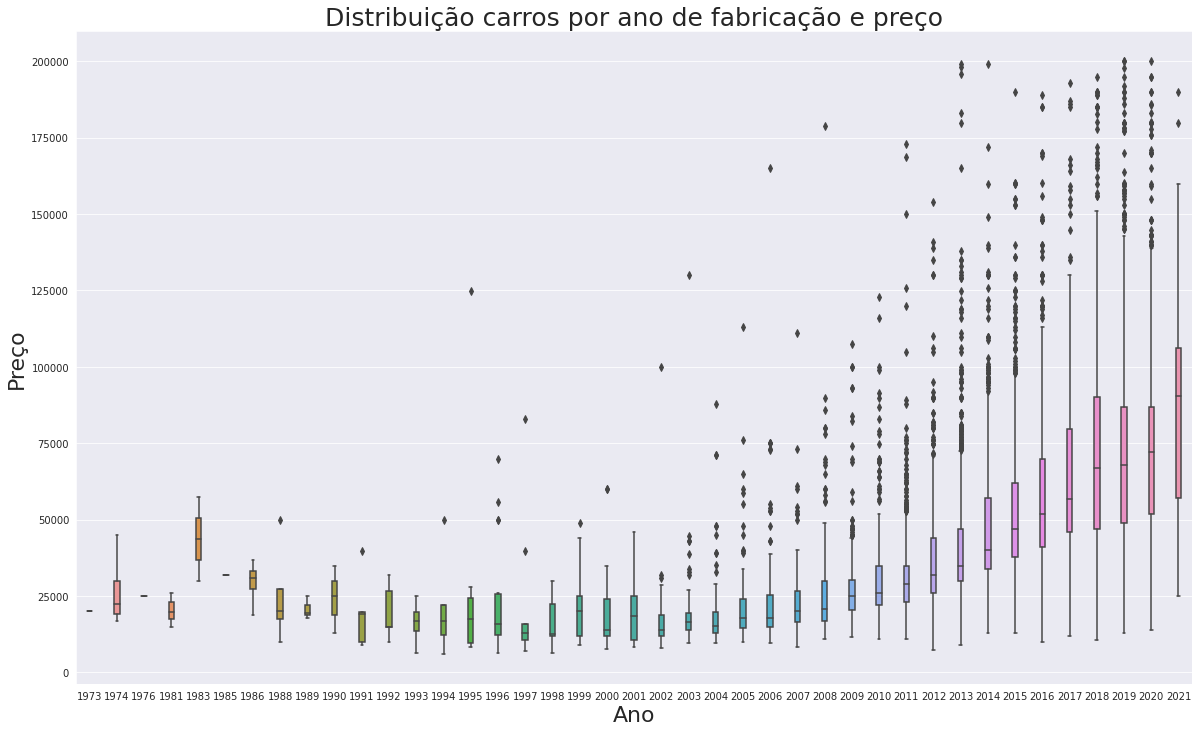

In [10]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

ax = sns.boxplot(x='ano', y='preco', data=dados, orient='v', width=0.2)
ax.figure.set_size_inches(20, 12)
ax.set_title('Distribuição carros por ano de fabricação e preço', fontsize=25)
ax.set_ylabel('Preço', fontsize=22)
ax.set_xlabel('Ano', fontsize=22)
ax

## Definindo as amostras de treino e teste

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enconder = LabelEncoder()

In [13]:
dados['marca'] = enconder.fit_transform(dados['marca'])
dados['modelo'] = enconder.fit_transform(dados['modelo'])

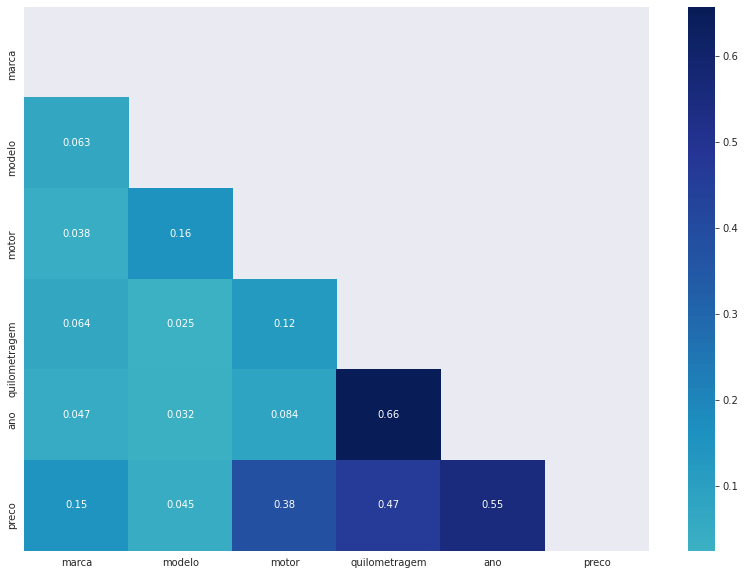

In [14]:
plt.figure(figsize=(14,10))

corr = dados.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, annot=True, center=0, cmap="YlGnBu")

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = dados.drop(columns=['preco','informacoes'])
Y = dados['preco']

In [17]:
X_treino,X_teste,Y_treino,Y_teste = train_test_split(X,Y,test_size=0.25,random_state=0 )

In [18]:
# treino['preco'] = treino['preco'].apply(np.log1p)
# treino['quilometragem'] = treino['quilometragem'].apply(np.log1p)
# teste['preco'] = teste['preco'].apply(np.log1p)
# teste['quilometragem'] = teste['quilometragem'].apply(np.log1p)

 - Modelo "Baseline" (Ponto de partida)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()
lr.fit(X_treino, Y_treino)
lr.score(X_teste, Y_teste)

0.5417496735786052

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [23]:
y_pred = lr.predict(X_teste)

MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 14690.2888
MSE = 434989338.9398
RMSE = 20856.3980
R2 = 0.5417


 - Machine learning

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
           
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9907983849457214
Test score 0.7008836861405472
Treinando RandomForestRegressor
Train score 0.9665587135995635
Test score 0.8199927893766518
Treinando MLPRegressor
Train score 0.24896311586568765
Test score 0.26582450329589113
Treinando XGBRegressor
[22:54:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.7868496545757013
Test score 0.7800094607696534


In [25]:
# repetindo processo com validação cruzada
import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


regressor_list = [
                  DecisionTreeRegressor(),
                  RandomForestRegressor(),
                  MLPRegressor(),
                  XGBRegressor(),
                  ]

for reg in regressor_list:
  print('Treinando', reg.__class__.__name__)
  reg.fit(X_treino, Y_treino)
  train_score = reg.score(X_treino, Y_treino)
  val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
  test_score = reg.score(X_teste, Y_teste)
  print('Train score', train_score)
  print('Validation score', val_score)
  print('Test score', test_score)
  print('='*80)

Treinando DecisionTreeRegressor
Train score 0.9907983849457214
Validation score [0.67202083 0.63557761 0.59188304 0.681306   0.6497132 ]
Test score 0.7009793479198444
Treinando RandomForestRegressor
Train score 0.9658990852764862
Validation score [0.78809666 0.7835525  0.76367407 0.80531918 0.8274492 ]
Test score 0.8179060663275615
Treinando MLPRegressor
Train score 0.25121723192022083
Validation score [0.22193368 0.2121632  0.21431287 0.24507416 0.25074349]
Test score 0.2658339089800671
Treinando XGBRegressor
[22:55:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:55:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in fav

## Gridsearch XGBRegressor

In [26]:
#  Todo: calibração do modelo
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5],
             'max_depth':[3,4,5,6,7,8],
             'n_estimators':[50, 100,150,200,250]}]
            
xgb = XGBRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=5)
gs.fit(X_treino, Y_treino)
xgb = gs.best_estimator_

train_score = xgb.score(X_treino, Y_treino)
val_score = cross_val_score(xgb, X_treino, Y_treino, cv=3)
test_score = xgb.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

[23:00:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:00:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score 0.8867418461475768
Validation score [0.78511628 0.78011592 0.81900778]
Test score 0.8288269691799668


 - Calculando o erro

In [27]:
y_pred = xgb.predict(X_teste)

MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 7099.7128
MSE = 162484212.7275
RMSE = 12746.9295
R2 = 0.8288


## Gridsearch RandomForest

In [28]:
from sklearn.model_selection import GridSearchCV
parameters=[{
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            'max_depth':[3,4,5,6,7,8,9,10],
            'n_estimators':np.arange(1,51,5)}]
            
reg = RandomForestRegressor(n_estimators=100, max_depth=1)
gs = GridSearchCV(reg,parameters,scoring='r2',n_jobs=-1,cv=5, refit = True)
gs.fit(X_treino, Y_treino)
reg = gs.best_estimator_

train_score = reg.score(X_treino, Y_treino)
val_score = cross_val_score(reg, X_treino, Y_treino, cv=5)
test_score = reg.score(X_teste, Y_teste)
print('Train score', train_score)
print('Validation score', val_score)
print('Test score', test_score)

Train score 0.8706932905140421
Validation score [0.78358257 0.77714182 0.7579607  0.79890483 0.81270033]
Test score 0.8127387291928493


 - Calculando o erro

In [29]:
y_pred = reg.predict(X_teste)

MAE  = mean_absolute_error(Y_teste,y_pred)
MSE  = mean_squared_error(Y_teste,y_pred)
RMSE = np.sqrt(mean_squared_error(Y_teste,y_pred))
R2 = r2_score(Y_teste, y_pred)


print('MAE = {:0.4f}'.format(MAE))
print('MSE = {:0.4f}'.format(MSE))
print('RMSE = {:0.4f}'.format(RMSE))
print('R2 = {:0.4f}'.format(R2))

MAE = 7839.2842
MSE = 177755806.5993
RMSE = 13332.5094
R2 = 0.8127
